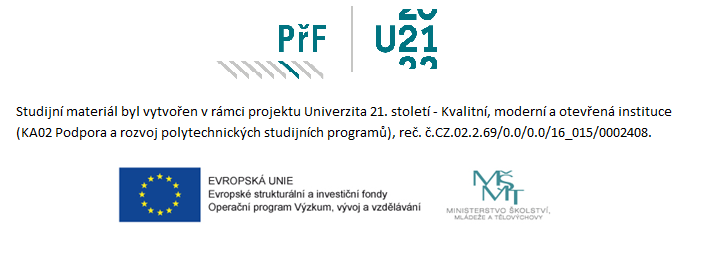

# Příprava datasetů a dat

V reálných úlohách se setkáváme se situacemi, kdy **některá data chybí**, např. neproběhlo dané měření či někdo nezodpověděl na dotazník. Pokud toto nastane, tak je nutné data vhodně doplnit.

Další situací, kterou je nutné řešit, je to, že dodávaná **data nejsou ve vhodném formátu** pro strojové učení, např. jsou ve formě řetezců, a je nutné je převést na formát dat, který je vhodný pro strojové učení, což jsou nejčastěji čísla. Některé algoritmy, např. *rozhodovací stromy* (*decision tree*), viz dále, však pracují klidně s řetězcovými daty obsahujícími výčet hodnot.

Poslední ze situací, která často nastává, je to, že **data nejsou ve stejném měřítku**, pak je nutné je normalizovat a standardizovat a to zejména v situacích, kdy používáme algoritmy strojového učení, které jsou na toto velmi citlivé, např. dříve zmiňovaný algoritmus *K-NN*.

Mimo výše zmiňované úpravy dat, je také nutné vzít v potaz vhodného rozdělení dat na trénovací a testovací (validační množinu).

V dalším se budeme jednotlivými úkoly zabývat a to tak, že si i ukážeme standardní nástroje pro jejich řešení. Vyzkoušejte si dodané ukázky kódu.

## Pandas a doplnění chybějících dat

Při použití knihovny *pandas* se setkáme s tím, že některé buňky neobsahují vůbec nic, tedy je zde hodnota **None**, nebo zde může sice být hodnota, ale nepodaří se jí reprezentovat jako číslo **NaN** (Not a Number) nebo **NaT** (Not a Time).

### Detekce chybějících hodnot
Mezi základní operace patří **detekce chybějících dat**. Toto můžeme realizovat buď "okometrií", nebo v případě rozsáhlejších dat můžeme použít funkce:


*  Pandas [isnull](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) a [isna](https://pandas.pydata.org/docs/reference/api/pandas.isna.html) pro detekci chybějících hodnot.
*   Případně jejich inverze [notnull](https://pandas.pydata.org/docs/reference/api/pandas.notnull.html) a [notna](https://pandas.pydata.org/docs/reference/api/pandas.notna.html).
*   Pro odstranění záznamů s chybějícími daty lze použít funkci [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna)



In [ ]:
import numpy as np
import pandas as pd
velikost = ['M','L',None,'XL','XL','S','XS','S',None,'M']
zbran = [0,1,0,1,1,0,0,0,1,0]
barva_obleceni = ['RED','BLACK','BLUE','BLACK','RED',None,'RED','BLUE','BLACK','BLACK']
nebezpeci = [ i**2 if v is not None else v  for i,v in enumerate(velikost) ]

data = pd.DataFrame(data = {'velikost':velikost,'zbran':zbran,'triko':barva_obleceni,'nebezpeci':nebezpeci})
data.head(10)

,velikost,zbran,triko,nebezpeci
0,M,0,RED,0.0
1,L,1,BLACK,1.0
2,None,0,BLUE,NaN
3,XL,1,BLACK,9.0
4,XL,1,RED,16.0
5,S,0,None,25.0
6,XS,0,RED,36.0
7,S,0,BLUE,49.0
8,None,1,BLACK,NaN
9,M,0,BLACK,81.0


#### Úkol k samostatné práci

Použijte výše uvedený dataset a proveďte následující:

1.   Vypište jména sloupců, které obsahují všechny hodnoty.
2.   Vypište jen řádky, kde chybí alespoň jedna hodnota.
3.   Vypište řádky, kde jsou v pořádku všechny hodnoty.



In [ ]:
#řešení
filter = pd.notna(data)
# vypis kde vsude neni chybejici hodnota
print(filter.head(10))
# 1 - pouziji any dle osy 0 - prochazim radky
print("1"*50)
print(filter.all(axis = 0))
# 2 - pouziji test na chybejici hodnotu a pouziji any
print("2"*50)
print(data[pd.isna(data).any(axis = 1)].head())
# 3 - pouziji test na chybejici hodnotu
print("3"*50)
print(data[pd.notna(data).all(axis = 1)].head())
# 3 - pouziji funkci dropna
print("3"*50)
print(data.dropna().head())

   velikost  zbran  triko  nebezpeci
0      True   True   True       True
1      True   True   True       True
2     False   True   True      False
3      True   True   True       True
4      True   True   True       True
5      True   True  False       True
6      True   True   True       True
7      True   True   True       True
8     False   True   True      False
9      True   True   True       True
11111111111111111111111111111111111111111111111111
velikost     False
zbran         True
triko        False
nebezpeci    False
dtype: bool
22222222222222222222222222222222222222222222222222
  velikost  zbran  triko  nebezpeci
2     None      0   BLUE        NaN
5        S      0   None       25.0
8     None      1  BLACK        NaN
33333333333333333333333333333333333333333333333333
  velikost  zbran  triko  nebezpeci
0        M      0    RED        0.0
1        L      1  BLACK        1.0
3       XL      1  BLACK        9.0
4       XL      1    RED       16.0
6       XS      0    RED    

### Doplnění chybějících hodnot

V případě, že máme nedostatek dat, nebo nemůžeme z nějakého důvodu vynechat záznamy s chybějící hodnotou, je nutné danou hodnotu dodat, vyplnit. K tomu lze použít funkce:

1.   Vyplnění předem danou hodnotou pomocí funkce [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna). Případně je možné specifikovat, jakým způsobem se určí doplňovaná hodnota pomocí parametru *method*.
2.   Případně je možné hodnoty interpolovat pomocí [interpolate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html), opět je možné si zvolit způsob interpolace.
3.   Pro nahrazení jedné hodnoty za jinou je možné využít funkce [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html).

Použití interpolace z okolních hodnot je důležité, v situaci, kdy se jedná např. o časovou řadu hodnot a chybějící hodnota je v nějaké souvztažnosti s hodnotami okolními. Pokud se jedná o víceméně náhodné uspořádání jednotlivých datových bodů, tak můžeme uvažovat o nahrazení průměrnou hodnotou, nebo nejčastější hodnotou (v případě řetězců).

Na následující ukázce kódu jsou metody ilustrovány.

In [ ]:
data['velikost'].fillna(method='bfill', inplace=True)
data['triko'].fillna(method='ffill', inplace=True)
data['nebezpeci'].interpolate(method='linear', inplace=True)
print(data)

  velikost  zbran  triko  nebezpeci
0        M      0    RED        0.0
1        L      1  BLACK        1.0
2       XL      0   BLUE        5.0
3       XL      1  BLACK        9.0
4       XL      1    RED       16.0
5        S      0    RED       25.0
6       XS      0    RED       36.0
7        S      0   BLUE       49.0
8        M      1  BLACK       65.0
9        M      0  BLACK       81.0


### Doplnění chybějících hodnot pomocí scikit-learn

V knihovně scikit-learn je pro doplňování chybějících hodnot možno využít třídu [Imputer](https://scikit-learn.org/stable/modules/impute.html#impute). Zde rozlišujeme, zda dochází ke vkládání hodnot na základě daného sloupce (*SimpleImputer*), nebo více okolních sloupců (*IterativeImputer*).

#### Úkol k samostatné činnosti

Použijte třídu *SimpleImputer* k doplnění hodnot výše uvedeného datasetu.

In [ ]:
#reseni
from sklearn.impute import SimpleImputer
#nejprve příprava datasetu
velikost = ['M','L',None,'XL','XL','S','XS','S',None,'M']
zbran = [0,1,0,1,1,0,0,0,1,0]
barva_obleceni = ['RED','BLACK','BLUE','BLACK','RED',None,'RED','BLUE','BLACK','BLACK']
nebezpeci = [ i**2 if v is not None else v  for i,v in enumerate(velikost) ]
data = pd.DataFrame(data = {'velikost':velikost,'zbran':zbran,'triko':barva_obleceni,'nebezpeci':nebezpeci})
# pozor jsou pouzity dva imputery
# prvni vkladani odstranuj np.NaN v jednom ze sloupcu
imputer = SimpleImputer(missing_values=np.NaN, strategy="mean")
data['nebezpeci'] = imputer.fit_transform(data['nebezpeci'].values.reshape(-1,1))
# druhe vkladani odstranuje None
imputer = SimpleImputer(missing_values=None, strategy="most_frequent")
data[:] = imputer.fit_transform(data)
data.head(10)

,velikost,zbran,triko,nebezpeci
0,M,0,RED,0.000
1,L,1,BLACK,1.000
2,M,0,BLUE,27.125
3,XL,1,BLACK,9.000
4,XL,1,RED,16.000
5,S,0,BLACK,25.000
6,XS,0,RED,36.000
7,S,0,BLUE,49.000
8,M,1,BLACK,27.125
9,M,0,BLACK,81.000


# Poznámka

Případně je možné doplnit chybějící hodnoty pomocí regresního modelu, nebo algoritmem typu KNN. Pro naučení modelu použijeme dataset bez vadných dat. V knihovně *sklearn* je např. třída [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html).

## Převod řetězcových dat a kategorické proměnné

Převodem řetězcových dat rozumíme jejich převod na reprezentaci vhodnou pro strojové učení, což jsou ve většině případů čísla.

Někdy může nastat situace, že v daném sloupci (příznaku) je očekáváno číslo. Formálně tam je, jen je zapsáno jako řetězec. V tomto případě použijeme funkce (konstruktor) pro vytvoření instancí příslušné třídy (*float()*, *int()*), případně pro převod časového formátu funkce *strptime()* a *strftime()*, více viz [zde](https://docs.python.org/3/library/datetime.html) a při použití knihovny *pandas* [zde](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).

Velmi častá situace je, že řetězcová data reprezentují nějaké kategorie, např. sloupce **velikost** a **triko** v příkladu výše. V tomto případě mluvíme o **kategorických proměnných**. Nabízí se možnost hodnoty pouze překódovat pomocí nějakého slovníku, kde hodnoty bereme dle pořadí výskytu v tabulce:

`konverze_velikost = {"M":0,"L":1,"XL":2,"S":3,"XS":4}`

a

`konverze_triko = {"RED":0,"BLACK":1,"BLUE":2}`.

Hodnoty v sloupci **velikost** představují veličinu, kde jednotlivé hodnoty můžeme vzájemně uspořádávat (porovnávat), takové hodnoty nazáváme **ordinální**. Lze vidět, že po zakódování prvním slovníkem se tato informace ztratila/pozměnila ("XS" < "M", ale $4 > 0$). Abychom se tomu vyhnuli, tak by musely být hodnoty ve slovníku přiřazeny klíčům v jiném pořadí. Ve druhém případě, kde není definováno porovnání mezi barvami, mluvíme o **nominálních** proměnných.
Všimněme si, že zde se naopak použitím kódování nová informace vytvořila ($0 < 2$, ale neplatí, že "RED" < "BLUE").





### Práce s kategorickými proměnnými

#### Ordinální kódování
Nejjednodušší způsobem je využití výše uvedeného slovníku (**ordinální kódování**), ale pro nominální hodnoty se vystavujeme riziku vytvoření neexistujících závislostí. V následující ukázce si ukážeme použití vlastního ordinálního kódovače a zároveň si ilustrujeme použití již existující implementace [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) z knihovny *scikitlearn*, který to za nás automatizuje. Vstupem pro metodu **fit** je dataset. Případně se pro kódování labelů nabízí též použití třídy [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [ ]:
# Implementace vlastního encoderu
def my_ordinal_encoder(column):
  def create_dict(column): # vytvari kodovaci slovnik
    return { v:i for i,v in enumerate(set(column))} # pouziti komprehenze
  coding_dict = create_dict(column) # ziskej kodovaci slovnik
  decoding_dict = {v:k for k,v in coding_dict.items()}
  coded = [ coding_dict[v] for v in column] # zakoduj
  return coded, coding_dict, decoding_dict

kodovano, slovnik, inverzni_slovnik = my_ordinal_encoder(data["triko"])
print(kodovano)
print(slovnik)
print(inverzni_slovnik)

[2, 0, 1, 0, 2, 0, 2, 1, 0, 0]
{'BLACK': 0, 'BLUE': 1, 'RED': 2}
{0: 'BLACK', 1: 'BLUE', 2: 'RED'}


In [ ]:
# Použití knihovny scikit-learn
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
kodovano = enc.fit_transform(data["triko"].values.reshape(-1,1))# musel jsem reshapovat, protoze to ceka 2D pole
print(kodovano)
print(enc.categories_)

[[2.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]]
[array(['BLACK', 'BLUE', 'RED'], dtype=object)]


#### Samostatný úkol

Naprogramujte metodu pro vlastní inverzní transformaci, tj. za použití vráceného slovníku pro dékodování, převeďte číselné hodnoty zpět na čísla.

#### One-Hot kódování

Rozumnou možností v případě nominálních proměnných je zavedení nové proměnné za každou hodnotu daného příznaku. Když daný příznak nabývá této hodnoty, tak odpovídající proměnná má hodnotu *1*, jinak *0*. Níže v ukázce je vidět použití metody *get_dummies()* z *pandas* na zakódování hodnoty sloupce triko a překopírování ostatních atributů.


In [ ]:
data_upraveno = pd.get_dummies(data["triko"])
for column in data.columns:
  if column != "triko":
    data_upraveno[column] = data[column]
data_upraveno

,BLACK,BLUE,RED,velikost,zbran,nebezpeci
0,0,0,1,M,0,0.000
1,1,0,0,L,1,1.000
2,0,1,0,M,0,27.125
3,1,0,0,XL,1,9.000
4,0,0,1,XL,1,16.000
5,1,0,0,S,0,25.000
6,0,0,1,XS,0,36.000
7,0,1,0,S,0,49.000
8,1,0,0,M,1,27.125
9,1,0,0,M,0,81.000


Pro one-hot kódování je možné použít též vestavěný [one-hot encoder ](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), viz ukázka níže. Poznamenejme, že pak je použita pro uložení hodnot sloupců řídká matice. Pokud se tomu chceme vyhnout, tak je nutné použít přepínač *sparse=False*.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
data_upraveno = pd.DataFrame(enc.fit_transform(data[["triko","velikost"]])) #převádím na normální pole
data_upraveno.columns = enc.get_feature_names_out()
data_upraveno


,triko_BLACK,triko_BLUE,triko_RED,velikost_L,velikost_M,velikost_S,velikost_XL,velikost_XS
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Při převodu sloupců na jednotlivé pomocné proměnné (*dummy variable*) může nastat situace, že jednotlivé sloupce jsou na sobě závislé, resp. mezi sloupci není lineární nezávislost a lze pak jeden sloupec vyjádřit pomocí ostatních. Při praktických úlohách nemusí dojít k lineární závislosti v matematickém slova smyslu, ale stačí, když jsou veličiny spolu silně korelovány, nebo jeden ze sloupců lze **přibližně** vyjádřit pomocí lineární kombinace ostatních. Mluvíme pak o **multikolinearitě** příznaků.
Tento jev může v případě některých modelů (*metoda nejmenších čtverců*,  *lineární regrese*, *logistická regrese*) vést k tomu, že model bude mít problémy se naučit - nejčastěji zde nebudou fungovat některé z předpokladů pro správnou funkci použitých optimalizačních nástrojů, např. matice pro **soustavu normálních rovnic** pro metodu nejmenších čtverců
\begin{equation}
X^TX\cdot w = X^T\cdot y,
\end{equation}
nemusí být regulární. Nicméně podotkněme, že celé řadě metod multikolinearita nevadí, nebo ji lze odstranit pomocí vhodné **regularizace**, ale každopádně nám nadbytečné příznaky zvyšují dimenzionalitu příznakového prostoru. Pro test, zda jsou sloupce tzv. multikolineární, lze použít [VIF](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html) (*Variance inflation factor*).

Výše uvedenému problému se říká *dummy variable trap*.
V případě, že se mu chceme vyhnout, lze vynechat jeden z odpovídajících sloupců a dojde tak ke kódování odpovídající hodnoty pomocí vektoru nul, protože je jasné, že když to není ani jedna z uvedených, tak to musí být zbývající hodnota. V níže uvedené ukázce, je při použití přepínače *drop='first'* odstraněn první sloupec při kódování daných příznaků. Podobně i knihova *pandas* v metodě [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) má tento přepínač.








In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first',sparse=False)
data_upraveno = pd.DataFrame(enc.fit_transform(data[["triko","velikost"]])) #převádím na normální pole
data_upraveno.columns = enc.get_feature_names_out()
data_upraveno

,triko_BLUE,triko_RED,velikost_M,velikost_S,velikost_XL,velikost_XS
0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0
7,1.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0


## Převod dat na stejné měřítko

Celá řada algoritmů strojového učení potřebuje pro svůj běh to, aby hodnoty obsažené v jednotlivých příznacích měly zhruba stejné měřítko.
Pro jeho získání je nutné hodnoty přepočítat. Můžeme používat lineární (*afinní*) transformace, nebo nelineární transformace.

V případě lineárních transformací jsou nejčastěji používané **standardizace** a **normalizace**. V knihovně *scikitlearn* jim odpovídá název *scaler*, tedy [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) a [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).
Pro standardizaci je každý ze sloupců příznaků ($x_i$) přepočítán dle vzorce:
\begin{equation}
z_i=\frac{x_i-\mu_i}{\sigma_i},
\end{equation}
kde $\mu_i$ je průměrná hodnota v daném sloupci $i$ a $\sigma_i$ je směrodatná odchylka v tomto sloupci. Dané hodnotě $z$ se říká *z-score*.

V případě *minmax škálování*, přepočítáme hodnoty na předem daný interval, nejčastěji na interval $<-1,1>$, nebo na interval $<0,1>$.
Rozhraní scalerů odpovídá běžným úkonům prováděným ve strojovém učení, uveďme některé z nich:

*   Naučení na tréninkových datech (určení $\mu$ a $\sigma$, resp.  $min$ a $max$) - metoda *fit()*, provádí se nejčastěji na tréninkových datech.
*   Naučení a provedení transformace - metoda *fit_transform()*, provádí se nejčastěji na tréninkových datech.
*   Pouhé provedení transformace - metoda *transform()*,  provádí se nejčastěji na testovacích (validačních) datech.
*   Provedení inverzní transformace - metoda *inverse_transform()*.


Pro uměle vygenerovaný dataset je jejich porovnání v níže uvedené ukázce.

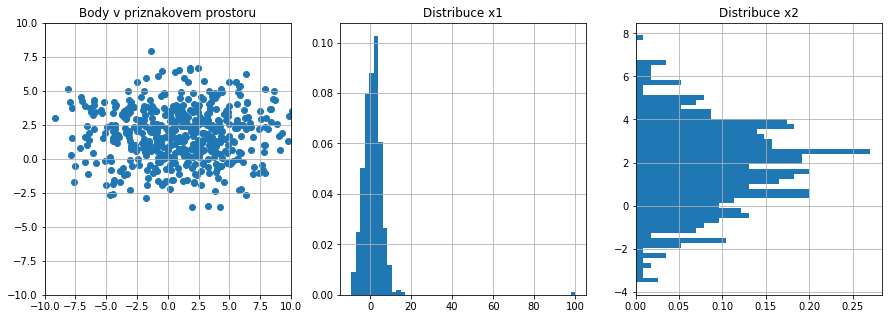

In [ ]:
# generování datasetu
import matplotlib.pyplot as plt
import numpy as np
mu1 = 1
mu2 = 2
sigma1 = 4
sigma2 = 2
N = 500
X = np.array((np.random.normal(mu1, sigma1, N), np.random.normal(mu2, sigma2, N))).transpose()
X[0,0] = 100 # odlehla hodnota
#generovani grafu
plt.rcParams['figure.figsize'] = [15, 5]
figure, axis = plt.subplots(1, 3)
axis[0].scatter(X[:,0],X[:,1])
axis[0].set_title("Body v priznakovem prostoru")
axis[0].set_xlim([-10,10])
axis[0].set_ylim([-10,10])
axis[0].grid()

axis[1].hist(X[:,0], bins=50, density=True)
axis[1].set_title("Distribuce x1")
axis[1].grid()

axis[2].hist(X[:,1], bins=50, density=True, orientation = 'horizontal')
axis[2].set_title("Distribuce x2")
axis[2].grid()

Porovnání obou přístupů je níže. Všimněte si, že distribuce hodnot je v obou případech podobná, ale je jiné měřítko grafů. Toto je dáno tím, že v datasetu je jedna odlehlá hodnota (zde *max*), která je daleko od ostatních a v případě *min-max* škálování jsou při transformaci na interval $<-1,1>$ ostatní hodnoty "zmáčknuty" k sobě. Zatímco při použití *z-score* k tomuto mačkání nedochází, protože nemáme pevně stanovené meze.

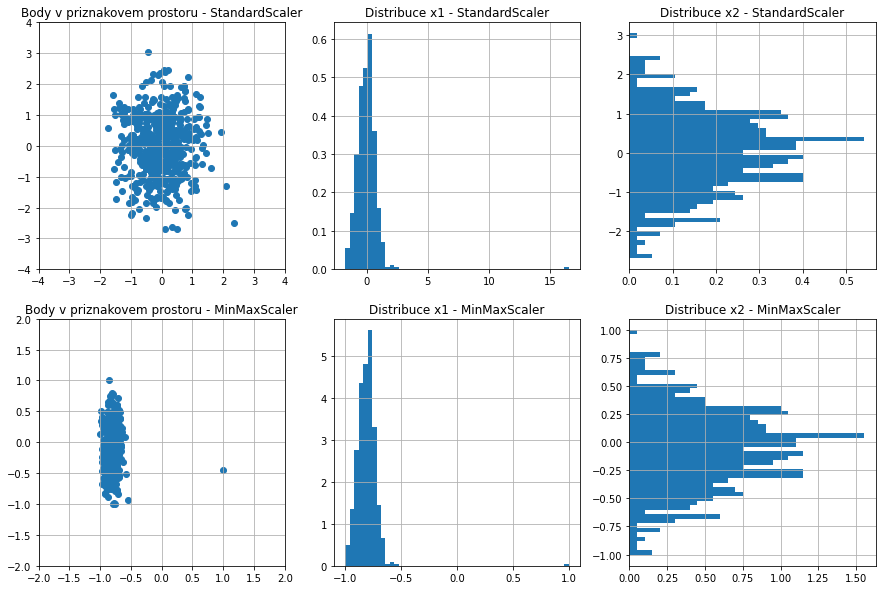

In [ ]:
#porovnání scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
stdsc = StandardScaler()
mmsc = MinMaxScaler(feature_range=(-1,1))#defaultně <0,1>

X_std = stdsc.fit_transform(X)
X_mm=mmsc.fit_transform(X)

#generovani grafu
plt.rcParams['figure.figsize'] = [15, 10]
figure, axis = plt.subplots(2, 3)
#StandardScaler
axis[0,0].scatter(X_std[:,0],X_std[:,1])
axis[0,0].set_title("Body v priznakovem prostoru - StandardScaler")
axis[0,0].set_xlim([-4,4])
axis[0,0].set_ylim([-4,4])
axis[0,0].grid()
axis[0,1].hist(X_std[:,0], bins=50, density=True)
axis[0,1].set_title("Distribuce x1 - StandardScaler")
axis[0,1].grid()
axis[0,2].hist(X_std[:,1], bins=50, density=True, orientation = 'horizontal')
axis[0,2].set_title("Distribuce x2 - StandardScaler")
axis[0,2].grid()
#MinMaxScaler
axis[1,0].scatter(X_mm[:,0],X_mm[:,1])
axis[1,0].set_title("Body v priznakovem prostoru - MinMaxScaler")
axis[1,0].set_xlim([-2,2])
axis[1,0].set_ylim([-2,2])
axis[1,0].grid()
axis[1,1].hist(X_mm[:,0], bins=50, density=True)
axis[1,1].set_title("Distribuce x1 - MinMaxScaler")
axis[1,1].grid()
axis[1,2].hist(X_mm[:,1], bins=50, density=True, orientation = 'horizontal')
axis[1,2].set_title("Distribuce x2 - MinMaxScaler")
axis[1,2].grid()


#### Samostatná činnost

Replikujte výše uvedené, ale použijte vlastní implementaci scalerů.

### Odstranění odlehlých hodnot a velký rozsah hodnot

Použití *z-skore* je výhodné i pro detekci odlehlých hodnot. Má-li daný příznak gaussovskou distribuci, pak hodnoty se *z-skore* větší nebo menší než $3$ je možné dle [pravidla tří sigma](https://cs.wikipedia.org/wiki/Pravidlo_t%C5%99%C3%AD_sigma) odstranit.

Místo odstranění odlehlých hodnot, je možné udělat tzv. **winsorizaci** kdy nejprve detekujeme odlehlé hodnoty, např. pomocí *z-skore*, a pak je nahradíme, např. pomocí maximální, či minimální hodnoty, která ještě splňuje pravidlo tří sigma. Implementace winsorizace je např. v knihovně [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html), kde se ovšem nahrazuje dané procento nejmenších a největších hodnot. Porovnejte data s použitím winsorizace a bez na ukázce níže.


In [ ]:
from scipy.stats.mstats import winsorize
x = np.random.normal(10, 5, 500) # 500 hodnot s N(10,5) pro winsorizaci
xw = winsorize(x, limits=[0.01, 0.01]) # nahraď 1% nejmenších a 1% největších.
print(f"Puvodni rozsah <{np.min(x)},{np.max(x)}>")
print(f"Puvodni rozsah <{np.min(xw)},{np.max(xw)}>")

Puvodni rozsah <-4.09339689418918,23.977668946490486>
Puvodni rozsah <-0.8214844845667173,21.348243535407768>


V případě, že data se v daném sloupci liší ve velkém rozsahu, např. několik řádů, tak je výhodné použít nějakou nelineární transformaci, např. *logaritmickou*, která sníží rozsah hodnot. Pokud se chceme přiblížit normálnímu rozdělení (např. protože potřebujeme dělat statistické testy, které to předpokládají), je možné použít [Box-Coxovu transformaci](https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/).

Na ukázce níže je to ukázáno na umělém datasetu. **Všimněte si vlivu logaritmování.**

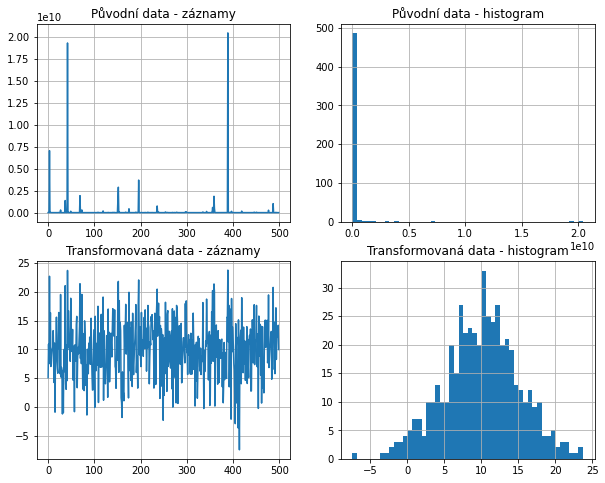

In [ ]:
x = np.exp(np.random.normal(10, 5, 500))
xl = np.log(x)
plt.rcParams['figure.figsize'] = [10, 8]
figure, axis = plt.subplots(2, 2)
axis[0,0].set_title("Původní data - záznamy")
axis[0,0].plot(x)
axis[0,0].grid()

axis[0,1].set_title("Původní data - histogram")
axis[0,1].hist(x, bins=50)
axis[0,1].grid()

axis[1,0].set_title("Transformovaná data - záznamy")
axis[1,0].plot(xl)
axis[1,0].grid()

axis[1,1].set_title("Transformovaná data - histogram")
axis[1,1].hist(xl, bins=50)
axis[1,1].grid()


##Rozdělení dat na trénovací, validační a testovací množinu

Ať už řešíme jakoukoliv úlohu strojového učení, tak téměř vždy potřebujeme vědět, jak se daný model bude chovat na datech která neviděl. Z tohoto důvodu se data dělí na dvě množiny a to **trénovací data**, na kterých je model naučen, a **testovací data**, která model dosud neměl k dispozici a je na nich ověřena účinnost modelu řešit danou úlohu. Protože celá řada modelů je závislých na tzv. *hyperparametrech*, tak potřebujeme ověřit vliv parametrů modelu, k tomu se používá tzv. **validační dataset**.
Když dělíme data do jednotlivých datasetů musíme zajistit to, aby jednotlivé datasety byly "podobné". Podobností zde míním to, aby v jednotlivých datasetech byly pokud možno stejně zastoupeny jednotlivé třídy (v případě klasifikace) či stejné spektrum hodnot (např. v případě regrese). Poměr rozdělení mezi trénovací a testovací data se obvykle bere $80:20$.Co dělat když nejsou, je uvedeno v poznámce níže.

Jednoduché rozdělení na trénovací a testovací data je možné ralizovat např. pomocí knihovny *numpy*, viz ukázka níže, kde používáme tzv. [wine dataset](https://archive.ics.uci.edu/ml/datasets/wine). Cílem je klasifikovat víno do jedné ze tří kategorií na základě jeho chemických vlastností.

Pro rozdělení je použit algoritmus, kdy indexy náhodně zamícháme a pak daný poměr vybereme jako trénovací a ostatní jako testovací data.

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
X = pd.DataFrame(data.data, columns = data.feature_names)#nacti si data
y = data.target# nacti si labely
for label in range(3):
  count = sum(y==label)
  print(f"Pocet prvku s labelem {label} = {count}, pomer = {count/len(y)}")

Pocet prvku s labelem 0 = 59, pomer = 0.33146067415730335
Pocet prvku s labelem 1 = 71, pomer = 0.398876404494382
Pocet prvku s labelem 2 = 48, pomer = 0.2696629213483146


Nyní ověříme, zda rozdělení na trénovací a testovací data zachovává tyto poměry.

In [ ]:
ratio = 0.8 # stanovení poměru trénovacích a testovacích dat.
index = np.array([i for i in range(len(y))])
np.random.shuffle(index)
length_tr = int(len(y)*ratio)

X_tr = X.values[index[:length_tr],:]
y_tr = y[index[:length_tr]]

X_test = X.values[index[length_tr:],:]
y_test = y[index[length_tr:]]

for label in range(3):
  class_cnt_tr = sum(y_tr==label)
  class_cnt_test = sum(y_test==label)
  print(f"TRENOVACI:Pocet prvku s labelem {label} = {class_cnt_tr}, pomer = {class_cnt_tr/len(y_tr)}")
  print(f"TESTOVACI:Pocet prvku s labelem {label} = {class_cnt_test}, pomer = {class_cnt_test/len(y_test)}")
  print("*"*40)

TRENOVACI:Pocet prvku s labelem 0 = 47, pomer = 0.33098591549295775
TESTOVACI:Pocet prvku s labelem 0 = 12, pomer = 0.3333333333333333
****************************************
TRENOVACI:Pocet prvku s labelem 1 = 56, pomer = 0.39436619718309857
TESTOVACI:Pocet prvku s labelem 1 = 15, pomer = 0.4166666666666667
****************************************
TRENOVACI:Pocet prvku s labelem 2 = 39, pomer = 0.2746478873239437
TESTOVACI:Pocet prvku s labelem 2 = 9, pomer = 0.25
****************************************


V knihovně *scikitlearn* jsou pro dělení dat na množiny nástroje. Níže v ukázce je použití jednoho [z nich](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Všimněte si nastavení semínka (*seed*) pro generování náhodných čísel - díky tomu je při každém spuštění generována stejná náhodná posloupnost a mám stejné rozdělení datasetů. Toto je výhodné, když testujeme vliv dalších parametrů modelu a chceme se vyhnout tomu, že při každém spuštění máme jinak zamíchaná data. Druhý zajímavý parametr je *stratify*, pomocí nějž rozdělíme data na testovací a trénovací tak, že je v nich zhruba stejné zastoupení jednotlivých tříd jako v celkových datech. Srovnej s ukázkou výše.

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
for label in range(3):
  class_cnt_tr = sum(y_tr==label)
  class_cnt_test = sum(y_test==label)
  print(f"TRENOVACI:Pocet prvku s labelem {label} = {class_cnt_tr}, pomer = {class_cnt_tr/len(y_tr)}")
  print(f"TESTOVACI:Pocet prvku s labelem {label} = {class_cnt_test}, pomer = {class_cnt_test/len(y_test)}")
  print("*"*40)

TRENOVACI:Pocet prvku s labelem 0 = 47, pomer = 0.33098591549295775
TESTOVACI:Pocet prvku s labelem 0 = 12, pomer = 0.3333333333333333
****************************************
TRENOVACI:Pocet prvku s labelem 1 = 57, pomer = 0.4014084507042254
TESTOVACI:Pocet prvku s labelem 1 = 14, pomer = 0.3888888888888889
****************************************
TRENOVACI:Pocet prvku s labelem 2 = 38, pomer = 0.2676056338028169
TESTOVACI:Pocet prvku s labelem 2 = 10, pomer = 0.2777777777777778
****************************************


#### Úkol pro samostatnou činnost

Opakovaným použitím rozdělte data na trénovací, validační a testovací v poměru 70:20:10.

**Poznámka - nevyvážené datasety**

V případě nevyvážených datasetů to buď můžeme nechat být a snažit se nevyváženost ošetřit pomocí vah jednotlivých tříd. Druhá možnost je vyrovnat počet prvků v jednotlivých třídách.

*  Undersampling - odstraníme z mohutnější třídy přebytečné prvky.
*  Oversampling - doplníme méně mohutné třídy o nové prvky.


Je možné použít například knihovnu [imbalanced-learn](https://imbalanced-learn.org/stable/index.html).



**Oversampling**
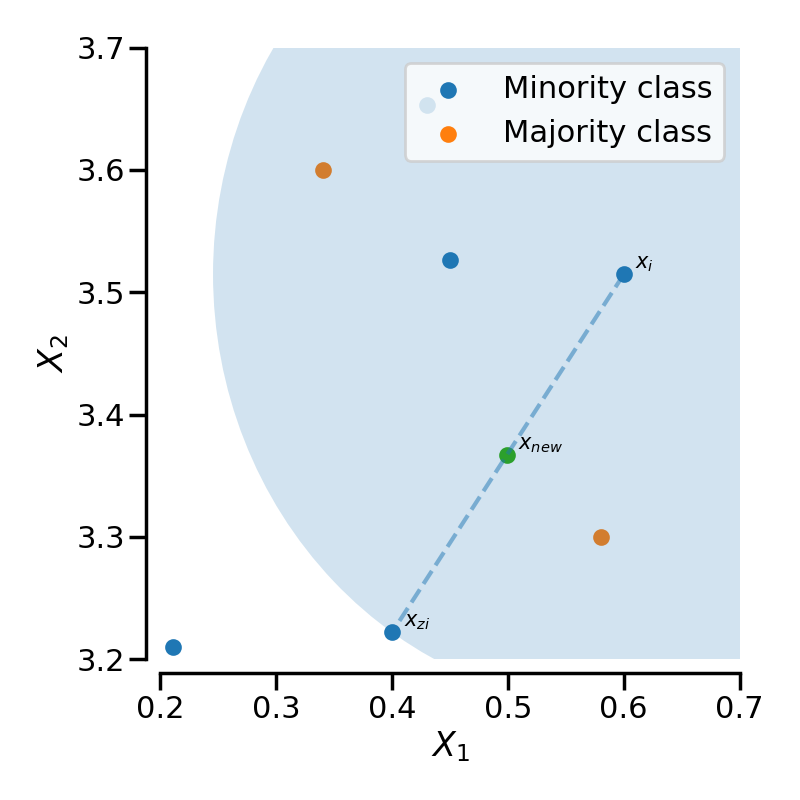

[Autor SMOTE https://imbalanced-learn.org/stable/over_sampling.html] (https://imbalanced-learn.org/stable/over_sampling.html)

### Vícenásobná validace

Abychom se vyhnuli tomu, že náhodou budou trénovací data "dobrá" a testovací "špatná", nebo obráceně, používá se vícenásobná validace. Podrobnější popis je uveden [zde](https://scikit-learn.org/stable/modules/cross_validation.html#stratification). Jedná se vlastně o opakované vybírání testovacích a trénovacích dat z celku (tzv. *fold*), abychom zamezili tomu, že se nám podaří vybrat data, která vycházejí pro model příznivě, ale v praxi pak model bude selhávat. Příkladem je algoritmus *K-fold validation*.
Často je součástí i souhrné ověření úspěšnosti, tedy nikoliv jen porovnání na dílčí datové sadě, ale za všechny foldy dohromady. V knihovně *scikit-learn* jsou již některé takové [algoritmy](https://scikit-learn.org/stable/modules/cross_validation.html) naprogramovány.


Obvykle máme několik konkurenčních modelů, které se liší jak použítím transformace dat, volbou parametrů, nebo i daným algoritmem. Protože je potřebujeme navzájem srovnávat, a nechceme mít složitý kód, tak spolu svážeme jednotlivé dílčí činnosti pomocí [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) (rour).    Roury (pipeliny) slouží k tomu, abychom si mohli sestavit celý proces transformace dat a učení modelu do jednoho objektu, který nám poskytuje metody *fit()*, *predict()*, *score()* (score odpovídá skórovací funkci pro klasifikátor v dané rouře), apod. a zapouzdřuje transformace dat s učením zároveň.

Nyní si ukážeme mírně komplexnější úlohu. Data jsou již očištěná, tak nebudeme nic odstraňovat a ani vkládat.
Pro ohodnocení budeme používat funkci *score()*, která v našem případě používá již dříve zmíněnou *accuracy*, viz metriky [zde](https://scikit-learn.org/stable/modules/model_evaluation.html), nebo v dřívějším sheetu pro **binární klasifikaci**.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer # tri druhy skalovani
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # pro rozdeleni  dat
from sklearn.model_selection import KFold # pouziti cross validace
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore') # hazi to warning, ignorujme je

# parametry
seed = 42
# nacteni dat
data = load_wine()
X = pd.DataFrame(data.data, columns = data.feature_names) #nacti si data
y = data.target# nacti si labely
# vytvoreni pipes
pipe_sc_lr = Pipeline([('scaler', StandardScaler()),('classifier', LogisticRegression())])
pipe_sc_knn = Pipeline([('scaler', StandardScaler()),('classifier', KNeighborsClassifier(n_neighbors=3))])
pipe_mm_lr = Pipeline([('scaler', MinMaxScaler()),('classifier', LogisticRegression())])
pipe_mm_knn = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier(n_neighbors=3))])
pipe_norm_lr = Pipeline([('scaler', Normalizer()),('classifier', LogisticRegression())])
pipe_norm_knn = Pipeline([('scaler', Normalizer()),('classifier', KNeighborsClassifier(n_neighbors=3))])
# udelej si seznam rour
pipes = {"pipe_sc_lr":pipe_sc_lr, "pipe_sc_knn":pipe_sc_knn,"pipe_mm_lr":pipe_mm_lr,"pipe_mm_knn":pipe_mm_knn,"pipe_norm_lr":pipe_norm_lr,"pipe_norm_knn":pipe_norm_knn}
# pro kazdou rouru si budeme drzet vysledky
results = { pipe_name: [] for pipe_name in pipes.keys()}
# rozdelime si data na trenovaci, ktere budeme delit dale, a testovaci, na kterych pak ukazeme chovani
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.2,random_state=seed) # testovaci data zatim nepouzijeme
# trenovaci mnozinu budeme delit dale na 5 podmnozin
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X_tr, y_tr): # vraci dvojici poli testovacich a trenovacich indexu
  # rozdel si data na trenovaci a na data, na kterych bude ohodnocen klasifikator
  X_fold_tr = X_tr.values[train_index]
  y_fold_tr = y_tr[train_index]
  X_fold_test = X_tr.values[test_index]
  y_fold_test = y_tr[test_index]
  for k, pipe in pipes.items(): # pro kazdou pipe, delej
    pipe.fit(X_fold_tr, y_fold_tr) # nauc
    results[k].append(pipe.score(X_fold_test,y_fold_test)) # uloz si accuracy
#udelej si dataframe pro zhodnoceni
results = pd.DataFrame(data = results)
print(results) # tiskni za jednoltive foldy uspesnost klasifikatoru
print(results.mean()) # tiskni prumer


   pipe_sc_lr  pipe_sc_knn  pipe_mm_lr  pipe_mm_knn  pipe_norm_lr  \
0    1.000000     0.965517    1.000000     0.965517      0.517241   
1    1.000000     0.896552    0.965517     0.896552      0.655172   
2    0.964286     1.000000    1.000000     1.000000      0.428571   
3    0.964286     0.964286    0.928571     0.964286      0.321429   
4    1.000000     1.000000    1.000000     1.000000      0.464286   

   pipe_norm_knn  
0       0.724138  
1       0.724138  
2       0.785714  
3       0.785714  
4       0.785714  
pipe_sc_lr       0.985714
pipe_sc_knn      0.965271
pipe_mm_lr       0.978818
pipe_mm_knn      0.965271
pipe_norm_lr     0.477340
pipe_norm_knn    0.761084
dtype: float64


#### Úkol pro samostatnou činnost

V příkladu výše jsou klasifikátory trénovány vždy na části z původních trénovacích dat a na zbytku jsou otestovány. Použili jsme tedy v podstatě rozdělení na data tréninková, na těch je model učen, a validační, na nich vybíráme nejlepší klasifikátor. Nyní zbývá ověřit, zda chování klasifikátorů na původních testovacích datech(dosud nepoužitých) je obdobné jako v případě vícenásobné validace. Dodělejte.

Pokud bychom nechtěli programovat vlastní vyhodnocení, tak bychom mohli použít nástroje a metriky zmíněné [zde](https://scikit-learn.org/stable/modules/cross_validation.html).
Srovnejte s předchozím a povšimněte si, že úvodní část je stejná, ale dále využíváme automatizované rozdělování a výpočtu daných metrik (defaultně *accuracy*).

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer # tri druhy skalovani
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # rozdeli  data
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score # pro automatizaci ohodnoceni
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore') # hazi to warning, ignorujme je

# parametry
seed = 42
# nacteni dat
data = load_wine()
X = pd.DataFrame(data.data, columns = data.feature_names) #nacti si data
y = data.target# nacti si labely
# vytvoreni pipes
pipe_sc_lr = Pipeline([('scaler', StandardScaler()),('classifier', LogisticRegression())])
pipe_sc_knn = Pipeline([('scaler', StandardScaler()),('classifier', KNeighborsClassifier(n_neighbors=3))])
pipe_mm_lr = Pipeline([('scaler', MinMaxScaler()),('classifier', LogisticRegression())])
pipe_mm_knn = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier(n_neighbors=3))])
pipe_norm_lr = Pipeline([('scaler', Normalizer()),('classifier', LogisticRegression())])
pipe_norm_knn = Pipeline([('scaler', Normalizer()),('classifier', KNeighborsClassifier(n_neighbors=3))])
# udelej si seznam rour
pipes = {"pipe_sc_lr":pipe_sc_lr, "pipe_sc_knn":pipe_sc_knn,"pipe_mm_lr":pipe_mm_lr,"pipe_mm_knn":pipe_mm_knn,"pipe_norm_lr":pipe_norm_lr,"pipe_norm_knn":pipe_norm_knn}
results = {}
# rozdel si data
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.2,random_state=seed) # testovaci data zatim nepouzijeme
# automatizace vyhodnoceni
for k, pipe in pipes.items(): # pro kazdou pipe, delej
  results[k] = cross_val_score(pipe, X_tr, y_tr, cv=5) # pouzij 5 foldu

#udelej si dataframe pro zhodnoceni
results = pd.DataFrame(data = results)
print(results) # tiskni za jednotlive foldy uspesnost klasifikatoru
print(results.mean()) # tiskni prumer


   pipe_sc_lr  pipe_sc_knn  pipe_mm_lr  pipe_mm_knn  pipe_norm_lr  \
0    0.965517     0.931034    1.000000     1.000000      0.586207   
1    0.965517     0.965517    0.965517     0.965517      0.482759   
2    1.000000     0.964286    0.964286     0.964286      0.464286   
3    0.964286     0.964286    0.964286     0.928571      0.464286   
4    1.000000     0.928571    1.000000     0.928571      0.500000   

   pipe_norm_knn  
0       0.827586  
1       0.862069  
2       0.750000  
3       0.571429  
4       0.750000  
pipe_sc_lr       0.979064
pipe_sc_knn      0.950739
pipe_mm_lr       0.978818
pipe_mm_knn      0.957389
pipe_norm_lr     0.499507
pipe_norm_knn    0.752217
dtype: float64


#Literatura

1)   Použití knihovny [Pandas](https://pandas.pydata.org/docs/user_guide/scale.html).

2)  [Blog](https://sebastianraschka.com/blog/2021/ml-course.html) autora knihy [Python Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition):

RASCHKA, Sebastian a Vahid MIRJALILI. Python machine learning: machine learning
and deep learning with Python, scikit-learn, and TensorFlow. Birmingham: Pack pub-
lishing, 2017. ISBN 978-1-78712-593-3.
